In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set the decimal point as 2 for all the float type field.
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 100)

In [2]:
#Read the loan.csv file and hold the data in master_loan
master_loan = pd.read_csv('loan.csv', encoding='ISO-8859-1', low_memory=False)
master_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Pers

In [3]:
#Find the loan.csv shape
loan = master_loan.copy()
loan.shape

(39717, 111)

In [4]:
#Find out the percentage of missing values in each column in loan dataset
column_names = round(100*(loan.isnull().sum()/len(loan.index)), 2)
column_names

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


In [5]:
#Find out all the columns which has more than 30 percentage of null values
column_names = list(column_names[column_names.values >= 30].index)
column_names

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_pa

In [6]:
#Drop all the columns which has more than 30 percentage of null values.
loan.drop(labels=column_names, axis=1, inplace=True)   
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [7]:
#Find out the number of rows and columns in a loan dataset
loan.shape

(39717, 53)

In [8]:
#Get the unique value count in each column
unique_list = loan.nunique()
unique_list

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [9]:
#Find out all the column has only one value in the loan dataset
unique_list = unique_list[unique_list.values == 1]
unique_list

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [10]:
#Drop all the column which has only one value in loan dataset
loan.drop(labels = unique_list.index,axis=1,inplace=True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


In [11]:
#Find out the number of rows and columns in a loan dataset
loan.shape

(39717, 44)

In [12]:
loan.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc 

In [13]:
#Find out the percentage of missing values in each column in the loan dataset.
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                        0.00
member_id                 0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_title                 6.19
emp_length                2.71
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
url                       0.00
purpose                   0.00
title                     0.03
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.13
total_acc                 0.00
out_prncp                 0.00
out_prnc

In [14]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


In [15]:
#Remove the unneccessary columns.
not_required_column_names = ['member_id','url','zip_code', 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                            'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                            'last_pymnt_d','last_pymnt_amnt']
loan.drop(labels = not_required_column_names,axis = 1,inplace =True)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,May-16,0.00
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.00
2,1077175,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,May-16,0.00
3,1076863,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,Apr-16,0.00
4,1075358,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,May-16,0.00


In [16]:
#Find out all blanks and replace it with 0 for emp_length field.
loan.emp_length.fillna('0',inplace=True)
loan.emp_length.replace(['n/a'],'Self-Employed',inplace=True)

loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,May-16,0.00
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.00
2,1077175,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,May-16,0.00
3,1076863,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,Apr-16,0.00
4,1075358,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,May-16,0.00


In [17]:
#Find out the percentage of loan purpose and based on the category
loan.purpose.value_counts()*100/len(loan.index)

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

In [18]:
print(loan.shape)
loan.info()

(39717, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
id                      39717 non-null int64
loan_amnt               39717 non-null int64
funded_amnt             39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
installment             39717 non-null float64
grade                   39717 non-null object
sub_grade               39717 non-null object
emp_title               37258 non-null object
emp_length              39717 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
title                   39706 non-null object
addr_state              39717 non-null object
dti  

In [19]:
#Remove the % from int_rate field
loan['int_rate'] = loan['int_rate'].str.replace("%","")

#convert the following columns to numeric
columns_to_numeric = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan[columns_to_numeric] = loan[columns_to_numeric].apply(pd.to_numeric)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,May-16,0.00
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.00
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,May-16,0.00
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,Apr-16,0.00
4,1075358,3000,3000,3000.00,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,May-16,0.00


In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
id                      39717 non-null int64
loan_amnt               39717 non-null int64
funded_amnt             39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null float64
installment             39717 non-null float64
grade                   39717 non-null object
sub_grade               39717 non-null object
emp_title               37258 non-null object
emp_length              39717 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
title                   39706 non-null object
addr_state              39717 non-null object
dti             

In [21]:
#Find out the percentage of Loan accepted status in loan dataset
loan.loan_status.value_counts()*100/len(loan.index)

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

### Derived metrics

In [22]:
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']
loan[['loan_income_ratio']].head()

,loan_income_ratio
0,0.21
1,0.08
2,0.20
3,0.20
4,0.04


In [23]:
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str 
loan[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
4,Dec-11,Dec,11


In [24]:
loan['issue_year'] = loan['issue_year'].apply(pd.to_numeric)+2000
loan[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,2011
1,Dec-11,Dec,2011
2,Dec-11,Dec,2011
3,Dec-11,Dec,2011
4,Dec-11,Dec,2011


In [25]:
#Order loan dataset by Months
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_month'] = pd.Categorical(loan['issue_month'],categories=months_order, ordered=True)

In [26]:
#Find out the loan amount range bucket
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
loan_range = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=loan_range)

In [27]:
#Find out the annual income range bucket
bins = [0, 25000, 50000, 75000, 100000,1000000]
income_range = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=income_range)

In [28]:
#Find out the loan interest range bucket
bins = [0, 7.5, 10, 12.5, 15,20]
interest_range = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=interest_range)

In [29]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,May-16,0.00,0.21,Dec,2011,0-5000,0-25000,10-12.5
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.00,0.08,Dec,2011,0-5000,25000-50000,15 and above
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,May-16,0.00,0.20,Dec,2011,0-5000,0-25000,15 and above
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,Apr-16,0.00,0.20,Dec,2011,5000-10000,25000-50000,12.5-15
4,1075358,3000,3000,3000.00,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,May-16,0.00,0.04,Dec,2011,0-5000,75000-100000,12.5-15


### Univariate Analysis 

#### Continuous Variables

####  1. Loan Amount

In [30]:
loan['loan_amnt'].describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

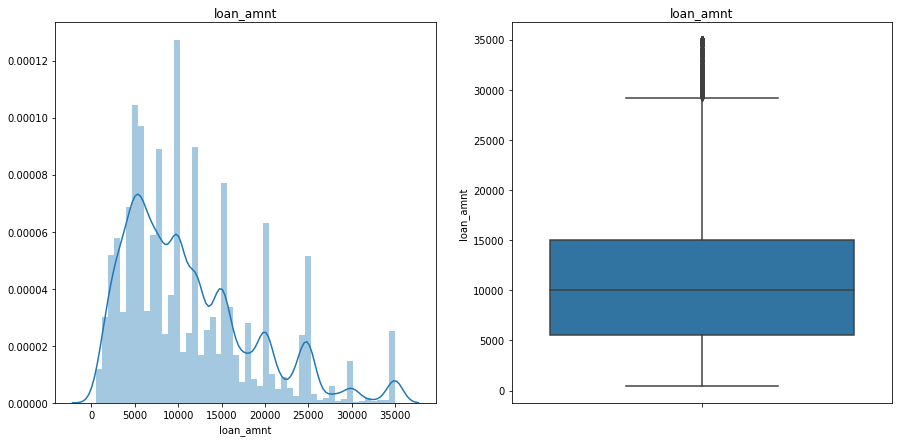

In [31]:
#Plot to show the loan amount in bar and box plot
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.distplot(loan["loan_amnt"])
plt.title("loan_amnt")
plt.subplot(1, 2, 2)
sns.boxplot( x="loan_amnt", data=loan,orient = 'v')
plt.title("loan_amnt")
plt.show()

#### 2.Interest Rate

In [32]:
#Find out the int_rate details
loan['int_rate'].describe()

count   39717.00
mean       12.02
std         3.72
min         5.42
25%         9.25
50%        11.86
75%        14.59
max        24.59
Name: int_rate, dtype: float64

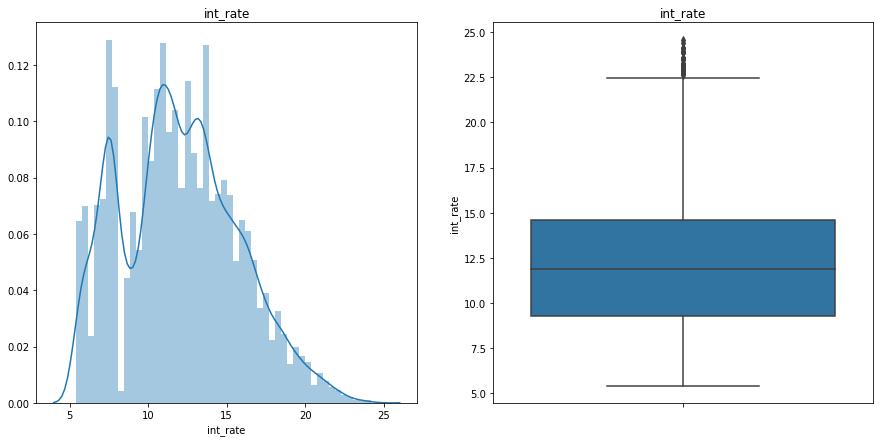

In [33]:
#Plot to show the interest rate range in bar as well box plot
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.distplot(loan["int_rate"])
plt.title("int_rate")
plt.subplot(1, 2, 2)
sns.boxplot( x="int_rate", data=loan,orient = 'v')
plt.title("int_rate")
plt.show()

#### 3.Annual Income 

In [34]:
#Find out the annual income details
loan['annual_inc'].describe()

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

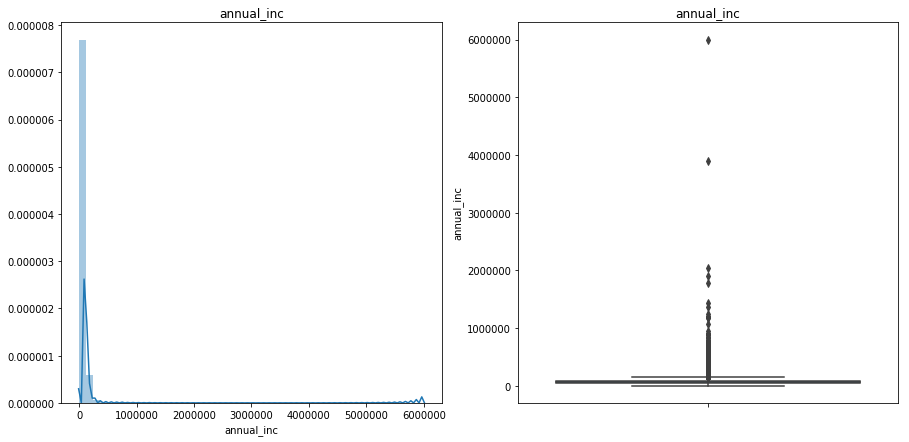

In [35]:
#Plot to show the annual income in both bar as well box plot to see the detailed information
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.distplot(loan["annual_inc"])
plt.title("annual_inc")
plt.subplot(1, 2, 2)
sns.boxplot( x="annual_inc", data=loan,orient = 'v')
plt.title("annual_inc")
plt.show()

#### Categorical Variables

#### 1.Loan Status

In [36]:
#Group the loan by loan status and find out loan amount, annual income and interest rate details  
loan_by_loanstatus = loan.groupby('loan_status')
loan_by_loanstatus['loan_amnt','annual_inc','int_rate'].describe()

loan_amnt                                                      \
                count     mean     std     min      25%      50%      75%   
loan_status                                                                 
Charged Off   5627.00 12104.39 8085.73  900.00  5600.00 10000.00 16500.00   
Current       1140.00 17053.99 8651.05 1000.00 12000.00 15825.00 23000.00   
Fully Paid   32950.00 10866.46 7199.63  500.00  5200.00  9600.00 15000.00   

                     annual_inc                                              \
                 max      count     mean      std     min      25%      50%   
loan_status                                                                   
Charged Off 35000.00    5627.00 62427.30 47776.01 4080.00 37000.00 53000.00   
Current     35000.00    1140.00 75430.67 46775.43 9960.00 47475.00 65000.00   
Fully Paid  35000.00   32950.00 69862.50 66562.25 4000.00 41132.75 60000.00   

                                int_rate                                    \
                 75%        max    count  mean  std  min   25%   50%   75%   
loan_status                                                                  
Charged Off 75000.00 1250000.00  5627.00 13.82 3.65 5.42 11.31 13.61 16.40   
Current     90000.00  650000.00  1140.00 15.03 3.60 6.00 11.99 14.65 17.99   
Fully Paid  84000.00 6000000.00 32950.00 11.61 3.60 5.42  8.49 11.49 13.99   

                   
              max  
loan_status        
Charged Off 24.40  
Current     24.59  
Fully Paid  24.11

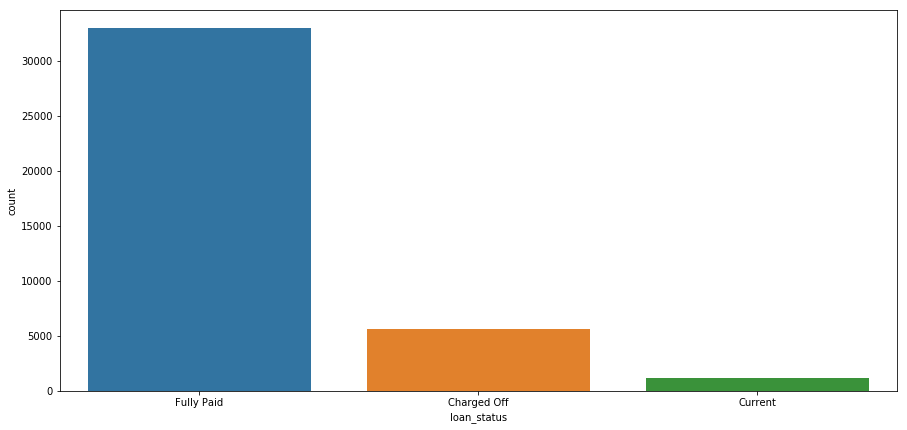

In [37]:
#Plot to show loan status
plt.figure(figsize=(15, 7))
sns.countplot(x="loan_status", data=loan)
plt.show()

#### 2.Purpose of Loan 

In [38]:
#Find out the purpose of loan has been taken
loan_by_purpose = loan.groupby("purpose")
loan_by_purpose['loan_amnt','annual_inc','int_rate'].describe()

loan_amnt                                            \
                       count     mean     std     min     25%      50%   
purpose                                                                  
car                  1549.00  6777.52 4106.82 1000.00 4000.00  6000.00   
credit_card          5130.00 11723.62 6986.05  725.00 6400.00 10000.00   
debt_consolidation  18641.00 12694.99 7479.95  700.00 7000.00 11500.00   
educational           325.00  6810.46 5141.44  900.00 3000.00  5400.00   
home_improvement     2976.00 11537.21 8085.74  900.00 5000.00 10000.00   
house                 381.00 13071.00 8285.10 1200.00 6000.00 11000.00   
major_purchase       2187.00  8155.43 6125.92 1000.00 4000.00  6000.00   
medical               693.00  8263.67 6119.47 1000.00 4000.00  6000.00   
moving                583.00  6650.17 5797.80 1000.00 3000.00  5000.00   
other                3993.00  8067.61 6421.72  500.00 3500.00  6000.00   
renewable_energy      103.00  8717.23 7071.08 1000.00 3425.00  6000.00   
small_business       1828.00 13567.27 8622.46  500.00 6500.00 12000.00   
vacation              381.00  5463.32 4338.20  500.00 2500.00  4800.00   
wedding               947.00  9876.03 6145.52 1000.00 5012.50  8000.00   

                                     annual_inc                              \
                        75%      max      count     mean       std      min   
purpose                                                                       
car                 8500.00 32000.00    1549.00 61842.04  35664.27  4800.00   
credit_card        15000.00 35000.00    5130.00 70439.15  49774.81  6000.00   
debt_consolidation 16800.00 35000.00   18641.00 67322.06  51483.46  4080.00   
educational         9500.00 25000.00     325.00 53471.37  43058.84  4000.00   
home_improvement   15000.00 35000.00    2976.00 89736.78 144542.67 10800.00   
house              17175.00 35000.00     381.00 76772.28  64959.86 15000.00   
major_purchase     10000.00 35000.00    2187.00 66391.52  63314.68  6000.00   
medical            10800.00 35000.00     693.00 68252.86  56471.39  8088.00   
moving              8000.00 35000.00     583.00 61801.58  54363.68  5500.00   
other              10000.00 35000.00    3993.00 63147.25  50633.91  4800.00   
renewable_energy   12300.00 35000.00     103.00 77490.01  82708.93 10980.00   
small_business     20000.00 35000.00    1828.00 75062.52  51086.08  8400.00   
vacation            7000.00 29700.00     381.00 59218.93  32554.28  4888.00   
wedding            12037.50 35000.00     947.00 68663.28  52200.58 11029.00   

                                                          int_rate             \
                        25%      50%       75%        max    count  mean  std   
purpose                                                                         
car                38000.00 54000.00  76000.00  300000.00  1549.00 10.53 3.39   
credit_card        43358.00 60000.00  85000.00 1900000.00  5130.00 11.70 3.56   
debt_consolidation 41000.00 58000.00  80000.00 2039784.00 18641.00 12.49 3.73   
educational        26000.00 41000.00  70000.00  425000.00   325.00 11.65 2.54   
home_improvement   50000.00 72000.00 103000.00 6000000.00  2976.00 11.40 3.78   
house              43000.00 63000.00  88860.00  780000.00   381.00 12.23 3.98   
major_purchase     37968.00 55000.00  79910.00 1440000.00  2187.00 10.84 3.61   
medical            38400.00 55536.00  80000.00  900000.00   693.00 11.49 3.68   
moving             33798.00 49800.00  72500.00  840000.00   583.00 11.56 3.53   
other              36000.00 52000.00  76872.00 1200000.00  3993.00 11.82 3.57   
renewable_energy   36000.00 63816.00  93580.00  600000.00   103.00 11.44 3.83   
small_business     45000.00 63000.00  90000.00  616000.00  1828.00 13.01 3.94   
vacation           37000.00 51600.00  75000.00  195000.00   381.00 10.86 3.51   
wedding            43000.00 60000.00  80000.00  900000.00   947.00 11.89 3.57   

                                      

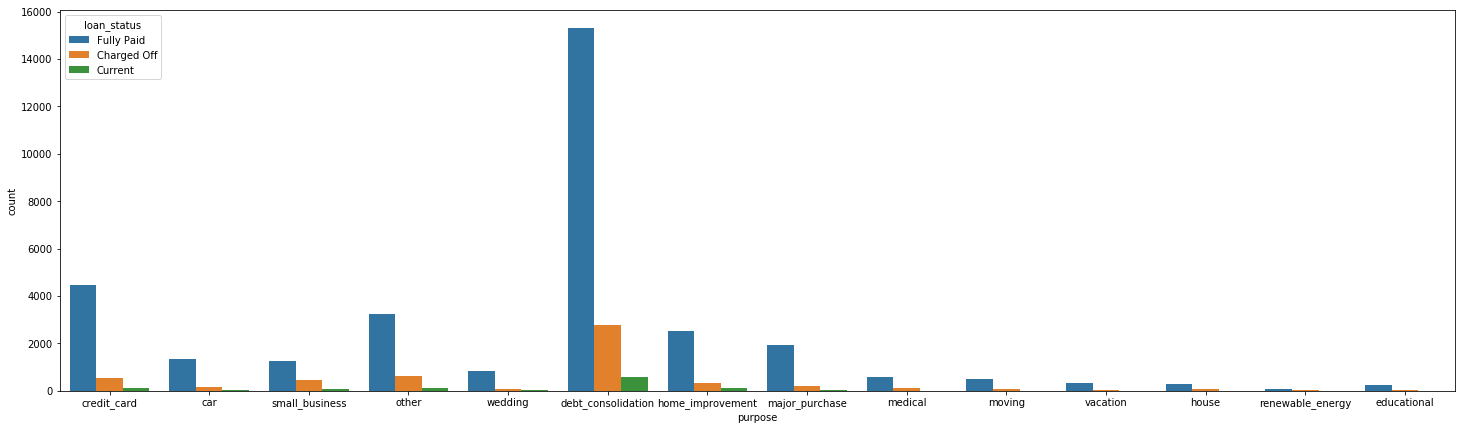

In [39]:
#Plot to show the purpose, loan status to analyse who paid fully, charged off and running loan status
plt.figure(figsize=(25, 7))
sns.countplot(x="purpose", data=loan,hue = "loan_status")
plt.show()

#### 3.House Ownership

In [40]:
#Find out the house ownership
loan_by_house_ownership = loan.groupby("home_ownership")
loan_by_house_ownership['loan_amnt','annual_inc','int_rate'].describe()

loan_amnt                                                     \
                   count     mean     std     min     25%      50%      75%   
home_ownership                                                                
MORTGAGE        17659.00 12690.07 8037.04  500.00 6000.00 10800.00 17500.00   
NONE                3.00  5600.00 3857.46 2800.00 3400.00  4000.00  7000.00   
OTHER              98.00 10663.01 5883.24 1000.00 6000.00 10000.00 15000.00   
OWN              3058.00 10256.75 7053.08  900.00 5000.00  8312.50 14125.00   
RENT            18899.00 10004.85 6679.68  500.00 5000.00  8400.00 13475.00   

                        annual_inc                                      \
                    max      count     mean      std      min      25%   
home_ownership                                                           
MORTGAGE       35000.00   17659.00 83116.96 79438.70  7904.04 51870.00   
NONE           10000.00       3.00 80733.33 51668.30 22200.00 61100.00   
OTHER          25000.00      98.00 71309.71 66047.19 11389.00 40000.00   
OWN            35000.00    3058.00 58863.32 49422.63  4800.00 33000.00   
RENT           35000.00   18899.00 57370.33 43593.21  4000.00 36000.00   

                                              int_rate                       \
                     50%       75%        max    count  mean  std  min  25%   
home_ownership                                                                
MORTGAGE        70000.00  98000.00 6000000.00 17659.00 11.77 3.88 5.42 8.49   
NONE           100000.00 110000.00  120000.00     3.00  8.70 0.95 7.75 8.22   
OTHER           60000.00  82492.00  600000.00    98.00 12.04 2.65 7.40 9.65   
OWN             48000.00  70000.00 1200000.00  3058.00 11.77 3.73 5.42 8.59   
RENT            50000.00  69996.00 2039784.00 18899.00 12.29 3.56 5.42 9.91   

                                  
                 50%   75%   max  
home_ownership                    
MORTGAGE       11.49 14.27 24.59  
NONE            8.70  9.17  9.64  
OTHER          11.86 14.38 17.90  
OWN            11.58 14.22 23.59  
RENT           12.21 14.72 24.40

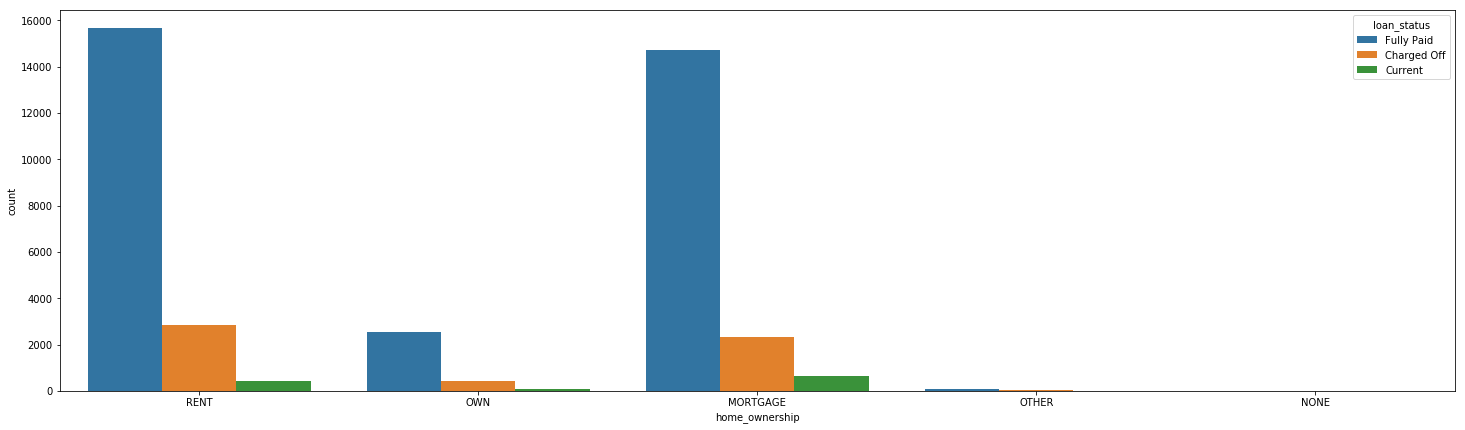

In [41]:
#Plot house ownership against loan status
plt.figure(figsize=(25, 7))
sns.countplot(x="home_ownership", data=loan,hue = "loan_status")
plt.show()

#### 4.Year

In [42]:
loan_by_year = loan.groupby("issue_year")
loan_by_year ['loan_amnt','annual_inc','int_rate'].describe()

loan_amnt                                                     \
               count     mean     std     min     25%      50%      75%   
issue_year                                                                
2007          251.00  8841.73 6447.77  500.00 4137.50  6500.00 12000.00   
2008         1562.00  9212.72 5774.29  500.00 5000.00  7500.00 12000.00   
2009         4716.00  9846.55 5934.10 1000.00 5000.00  9000.00 14000.00   
2010        11532.00 10583.61 6602.36 1000.00 5000.00  9600.00 15000.00   
2011        21656.00 12029.30 8159.40 1000.00 6000.00 10000.00 16000.00   

                    annual_inc                                              \
                max      count     mean      std     min      25%      50%   
issue_year                                                                   
2007       25000.00     251.00 72262.68 62899.27 5000.00 36276.50 58800.00   
2008       25000.00    1562.00 65119.69 65668.09 7904.04 38250.00 53989.50   
2009       25000.00    4716.00 68100.74 61328.46 4000.00 39996.00 56004.00   
2010       25000.00   11532.00 68892.32 86889.95 4080.00 40000.00 57600.00   
2011       35000.00   21656.00 69438.24 47609.07 6000.00 42000.00 60000.00   

                               int_rate                                    \
                75%        max    count  mean  std  min   25%   50%   75%   
issue_year                                                                  
2007       88000.00  616000.00   251.00 10.32 2.04 7.12  8.70 10.28 11.54   
2008       77000.00 2039784.00  1562.00 11.16 2.06 6.00  9.76 11.03 12.41   
2009       80000.00 1440000.00  4716.00 12.19 2.58 6.00 10.62 12.21 13.92   
2010       80521.14 6000000.00 11532.00 11.75 3.43 5.42  8.88 11.49 14.35   
2011       84000.00 1782000.00 21656.00 12.21 4.15 5.42  8.90 11.71 15.27   

                  
             max  
issue_year        
2007       15.96  
2008       19.04  
2009       21.21  
2010       21.64  
2011       24.59

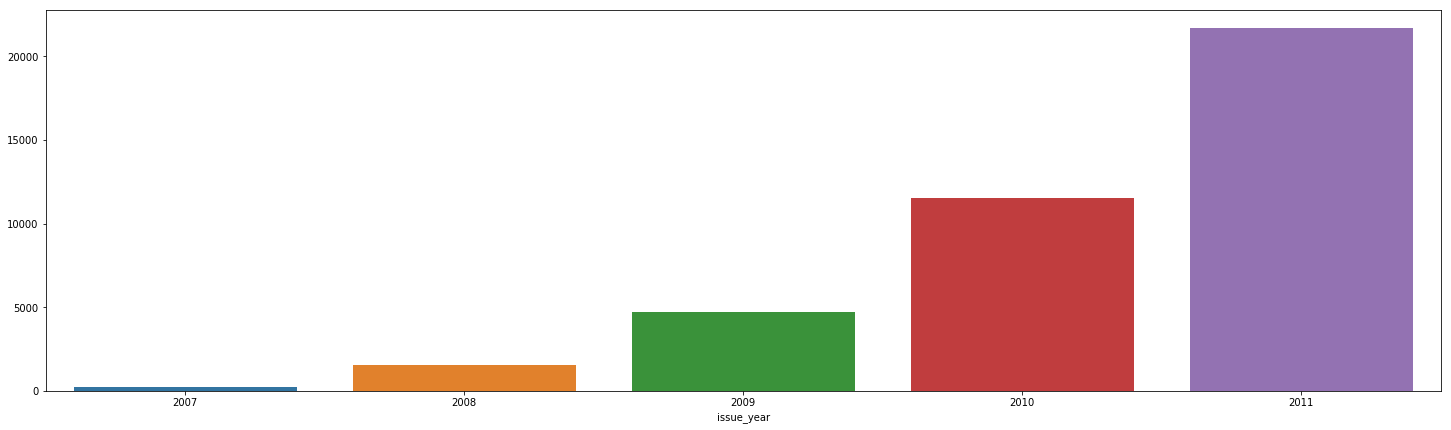

In [43]:
#Plot to show in which year loan has been issued maximum
loan_by_year = loan.groupby("issue_year")['id'].count()
loan_by_year.rename(columns={"id": "count"},inplace=True)
plt.figure(figsize=(25, 7))
sns.barplot(x=loan_by_year.index,y=loan_by_year.values )
plt.show()

#### 5.Loan Term

In [44]:
loan.loc[loan["loan_status"]=='Charged Off']

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.00,0.08,Dec,2011,0-5000,25000-50000,15 and above
8,1071795,5600,5600,5600.00,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,Aug-12,0.00,0.14,Dec,2011,5000-10000,25000-50000,NaN
9,1071570,5375,5375,5350.00,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,Building my credit history.,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,Mar-13,0.00,0.36,Dec,2011,5000-10000,0-25000,12.5-15
12,1064687,9000,9000,9000.00,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,debt_consolidation,freedom,VA,10.08,0,Apr-04,1,4,0,10452,91.70%,9,Nov-12,0.00,0.30,Dec,2011,5000-10000,25000-50000,12.5-15
14,1069057,10000,10000,10000.00,36 months,10.65,325.74,B,B2,SFMTA,3 years,RENT,100000.00,Source Verified,Dec-11,Charged Off,other,Other Loan,CA,7.06,0,May-91,2,14,0,11997,55.50%,29,Mar-14,0.00,0.10,Dec,2011,5000-10000,75000-100000,10-12.5
21,1039153,21000,21000,21000.00,36 months,12.42,701.73,B,B4,Osram Sylvania,10+ years,RENT,105000.00,Verified,Dec-11,Charged Off,debt_consolidation,Debt Cleanup,FL,13.22,0,Feb-83,0,7,0,32135,90.30%,38,May-16,0.00,0.20,Dec,2011,20000-25000,100000 and above,10-12.5
24,1069559,6000,6000,6000.00,36 months,11.71,198.46,B,B3,bmg-educational,1 year,RENT,76000.00,Not Verified,Dec-11,Charged Off,major_purchase,cash,CA,2.40,0,Jun-01,1,7,0,5963,29.70%,7,Mar-13,0.00,0.08,Dec,2011,5000-10000,75000-100000,10-12.5
26,1069800,15000,15000,8725.00,36 months,14.27,514.64,C,C2,nyc transit,9 years,RENT,60000.00,Not Verified,Dec-11,Charged Off,debt_consolidation,consolidation,NY,15.22,0,Oct-03,1,7,0,5872,57.60%,11,May-16,0.00,0.25,Dec,2011,10000-15000,50000-75000,12.5-15
27,1069657,5000,5000,5000.00,60 months,16.77,123.65,D,D2,Frito Lay,2 years,RENT,50004.00,Not Verified,Dec-11,Charged Off,other,Other,PA,13.97,3,Oct-03,0,14,0,4345,59.50%,22,May-13,0.00,0.10,Dec,2011,0-5000,50000-75000,15 and above
46,1069465,5000,5000,5000.00,36 months,8.90,158.77,A,A5,STERIS Corporation,10+ years,MORTGAGE,100000.00,Source Verified,Dec-11,Charged Off,debt_consolidation,Debt Consolidation for a better life,OH,16.33,0,Jun-95,0,17,0,74351,62.10%,35,Dec-14,0.00,0.05,Dec,2011,0-5000,75000-100000,7.5-10


In [45]:
loan_by_loanterm = loan.groupby(['term','loan_status'])
loan_by_loanterm['loan_amnt','annual_inc','int_rate'].describe()

loan_amnt                                             \
                           count     mean     std     min      25%      50%   
term       loan_status                                                        
 36 months Charged Off   3227.00  9388.72 6446.41  900.00  4850.00  8000.00   
           Fully Paid   25869.00  9618.41 6307.38  500.00  5000.00  8000.00   
 60 months Charged Off   2400.00 15755.82 8612.95 1000.00  9000.00 15000.00   
           Current       1140.00 17053.99 8651.05 1000.00 12000.00 15825.00   
           Fully Paid    7081.00 15425.94 8330.16 1000.00  9000.00 14500.00   

                                         annual_inc                            \
                            75%      max      count     mean      std     min   
term       loan_status                                                          
 36 months Charged Off 12000.00 35000.00    3227.00 59168.55 45837.57 4080.00   
           Fully Paid  12250.00 35000.00   25869.00 68168.08 65414.77 4000.00   
 60 months Charged Off 21000.00 35000.00    2400.00 66808.96 49940.24 6000.00   
           Current     23000.00 35000.00    1140.00 75430.67 46775.43 9960.00   
           Fully Paid  20000.00 35000.00    7081.00 76052.75 70254.25 4800.00   

                                                             int_rate        \
                            25%      50%      75%        max    count  mean   
term       loan_status                                                        
 36 months Charged Off 35000.00 50000.00 70000.00  840000.00  3227.00 12.38   
           Fully Paid  40000.00 57996.00 81000.00 6000000.00 25869.00 10.83   
 60 months Charged Off 41003.00 58632.00 79000.00 1250000.00  2400.00 15.75   
           Current     47475.00 65000.00 90000.00  650000.00  1140.00 15.03   
           Fully Paid  46000.00 65000.00 90000.00 3900000.00  7081.00 14.45   

                                                          
                        std  min   25%   50%   75%   max  
term       loan_status                                    
 36 months Charged Off 3.13 5.42 10.37 12.53 14.59 22.48  
           Fully Paid  3.21 5.42  7.88 10.91 13.22 23.22  
 60 months Charged Off 3.41 5.79 13.06 15.99 18.25 24.40  
           Current     3.60 6.00 11.99 14.65 17.99 24.59  
           Fully Paid  3.54 5.79 11.71 14.27 17.14 24.11

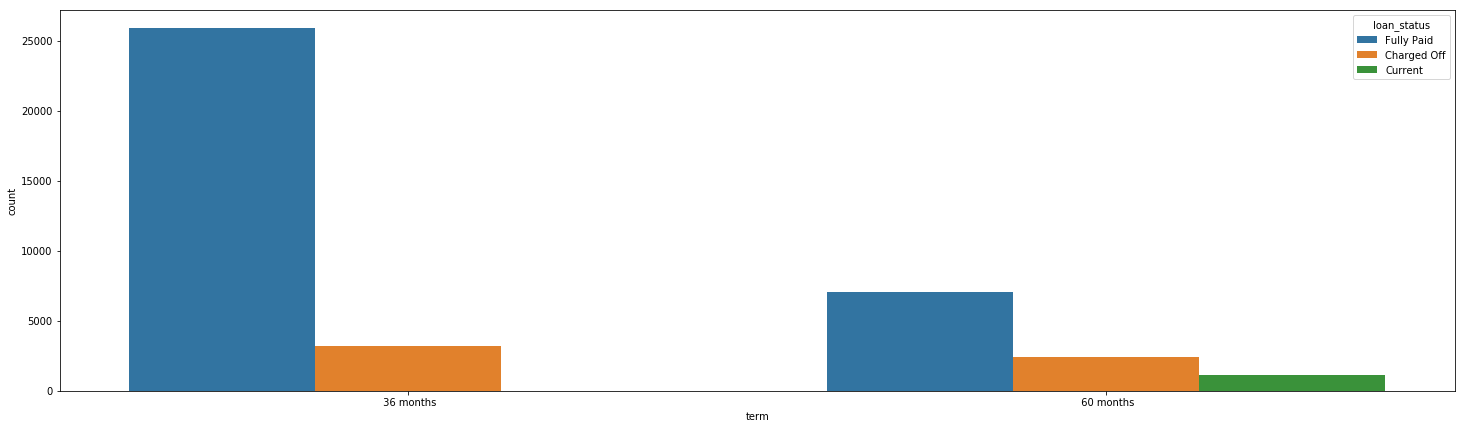

In [46]:
#Plot to show which loan status is performing good
plt.figure(figsize=(25, 7))
sns.countplot(x="term", data=loan,hue = "loan_status")
plt.show()

### Bivariate Analysis

#### 1. Purpose of Loan vs Loan Amount for each Loan Status

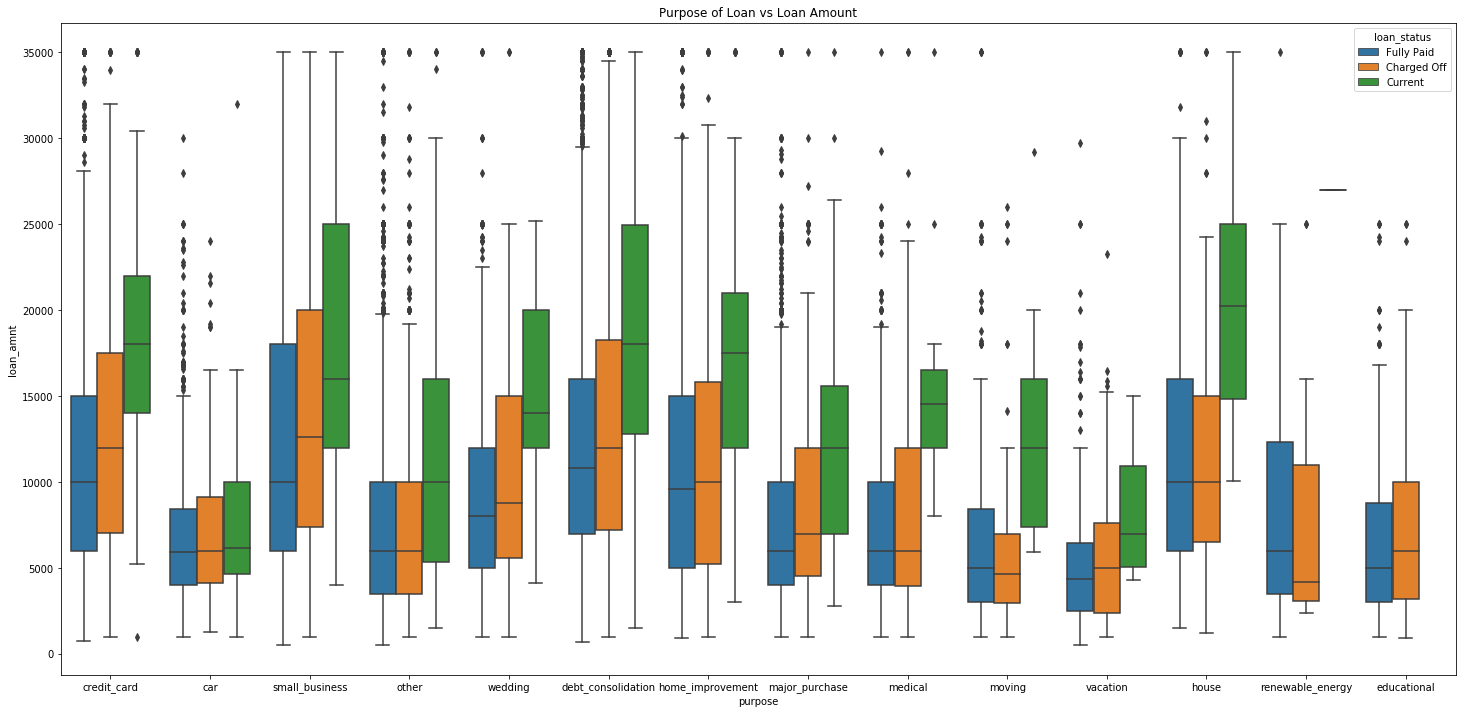

In [47]:
plt.figure(figsize=(25,12))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

#### 2.Correlation Matrix : All Continuous(Numeric) Variables

In [48]:
loan_correlation = loan.corr()
loan_correlation.drop(labels = 'id',axis = 1, inplace = True)
loan_correlation.drop(labels = 'id',axis = 0,inplace = True)

In [49]:
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,loan_income_ratio,issue_year
loan_amnt,1.00,0.98,0.94,0.31,0.93,0.27,0.07,-0.03,0.01,0.18,-0.05,0.32,0.26,-0.04,0.61,0.12
funded_amnt,0.98,1.00,0.96,0.31,0.96,0.27,0.07,-0.03,0.01,0.18,-0.05,0.31,0.25,-0.04,0.59,0.13
funded_amnt_inv,0.94,0.96,1.00,0.31,0.91,0.25,0.07,-0.04,-0.01,0.16,-0.05,0.29,0.24,-0.04,0.57,0.26
int_rate,0.31,0.31,0.31,1.00,0.28,0.05,0.11,0.16,0.13,0.01,0.10,0.10,-0.04,0.08,0.21,0.06
installment,0.93,0.96,0.91,0.28,1.00,0.27,0.05,-0.02,0.01,0.17,-0.05,0.31,0.23,-0.03,0.54,0.06
annual_inc,0.27,0.27,0.25,0.05,0.27,1.00,-0.12,0.02,0.03,0.16,-0.02,0.28,0.24,-0.02,-0.23,0.01
dti,0.07,0.07,0.07,0.11,0.05,-0.12,1.00,-0.03,0.00,0.29,-0.00,0.23,0.23,0.01,0.15,0.10
delinq_2yrs,-0.03,-0.03,-0.04,0.16,-0.02,0.02,-0.03,1.00,0.01,0.01,0.01,-0.06,0.07,0.00,-0.06,-0.00
inq_last_6mths,0.01,0.01,-0.01,0.13,0.01,0.03,0.00,0.01,1.00,0.09,0.02,-0.02,0.11,0.02,-0.03,-0.06
open_acc,0.18,0.18,0.16,0.01,0.17,0.16,0.29,0.01,0.09,1.00,0.00,0.29,0.69,0.01,-0.04,0.01


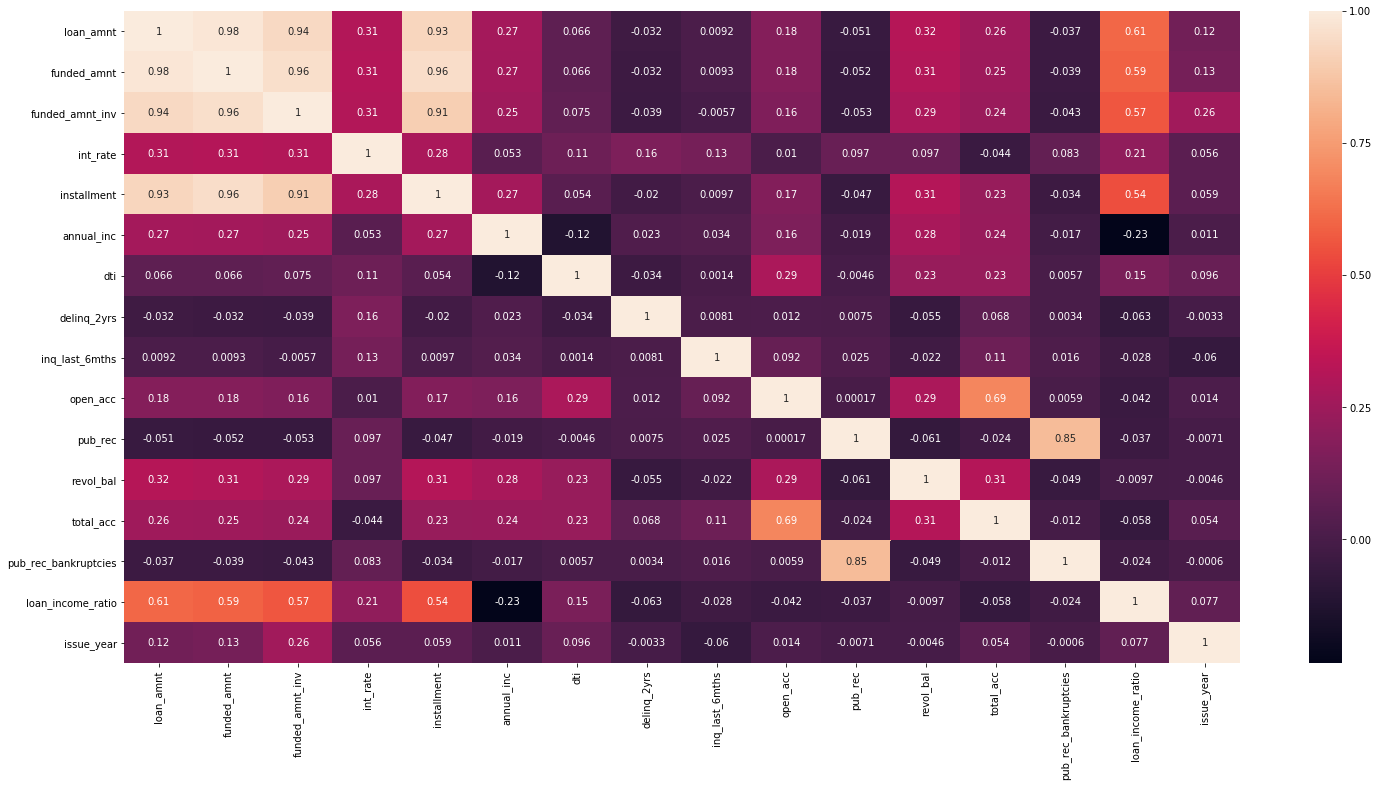

In [50]:
#Heat map to show various factors involved in loan dataset 
plt.figure(figsize=(25,12))
sns.heatmap(loan_correlation, xticklabels=loan_correlation.columns.values, yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

#### 4.Employment Length vs Loan Amount for different pupose of Loan

In [51]:
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt')

In [52]:
loanstatus=loan.loc[loan['loan_status']=='Charged Off']
loanstatus = loanstatus.loc[loanstatus['purpose'].isin(['debt_consolidation','credit_card','other','home_improvement' 
,'major_purchase' ,'small_business' ,'car','wedding','medical','moving'])]
loanstatus.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.00,0.08,Dec,2011,0-5000,25000-50000,15 and above
8,1071795,5600,5600,5600.00,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,Aug-12,0.00,0.14,Dec,2011,5000-10000,25000-50000,NaN
9,1071570,5375,5375,5350.00,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,Building my credit history.,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,Mar-13,0.00,0.36,Dec,2011,5000-10000,0-25000,12.5-15
12,1064687,9000,9000,9000.00,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,debt_consolidation,freedom,VA,10.08,0,Apr-04,1,4,0,10452,91.70%,9,Nov-12,0.00,0.30,Dec,2011,5000-10000,25000-50000,12.5-15
14,1069057,10000,10000,10000.00,36 months,10.65,325.74,B,B2,SFMTA,3 years,RENT,100000.00,Source Verified,Dec-11,Charged Off,other,Other Loan,CA,7.06,0,May-91,2,14,0,11997,55.50%,29,Mar-14,0.00,0.10,Dec,2011,5000-10000,75000-100000,10-12.5


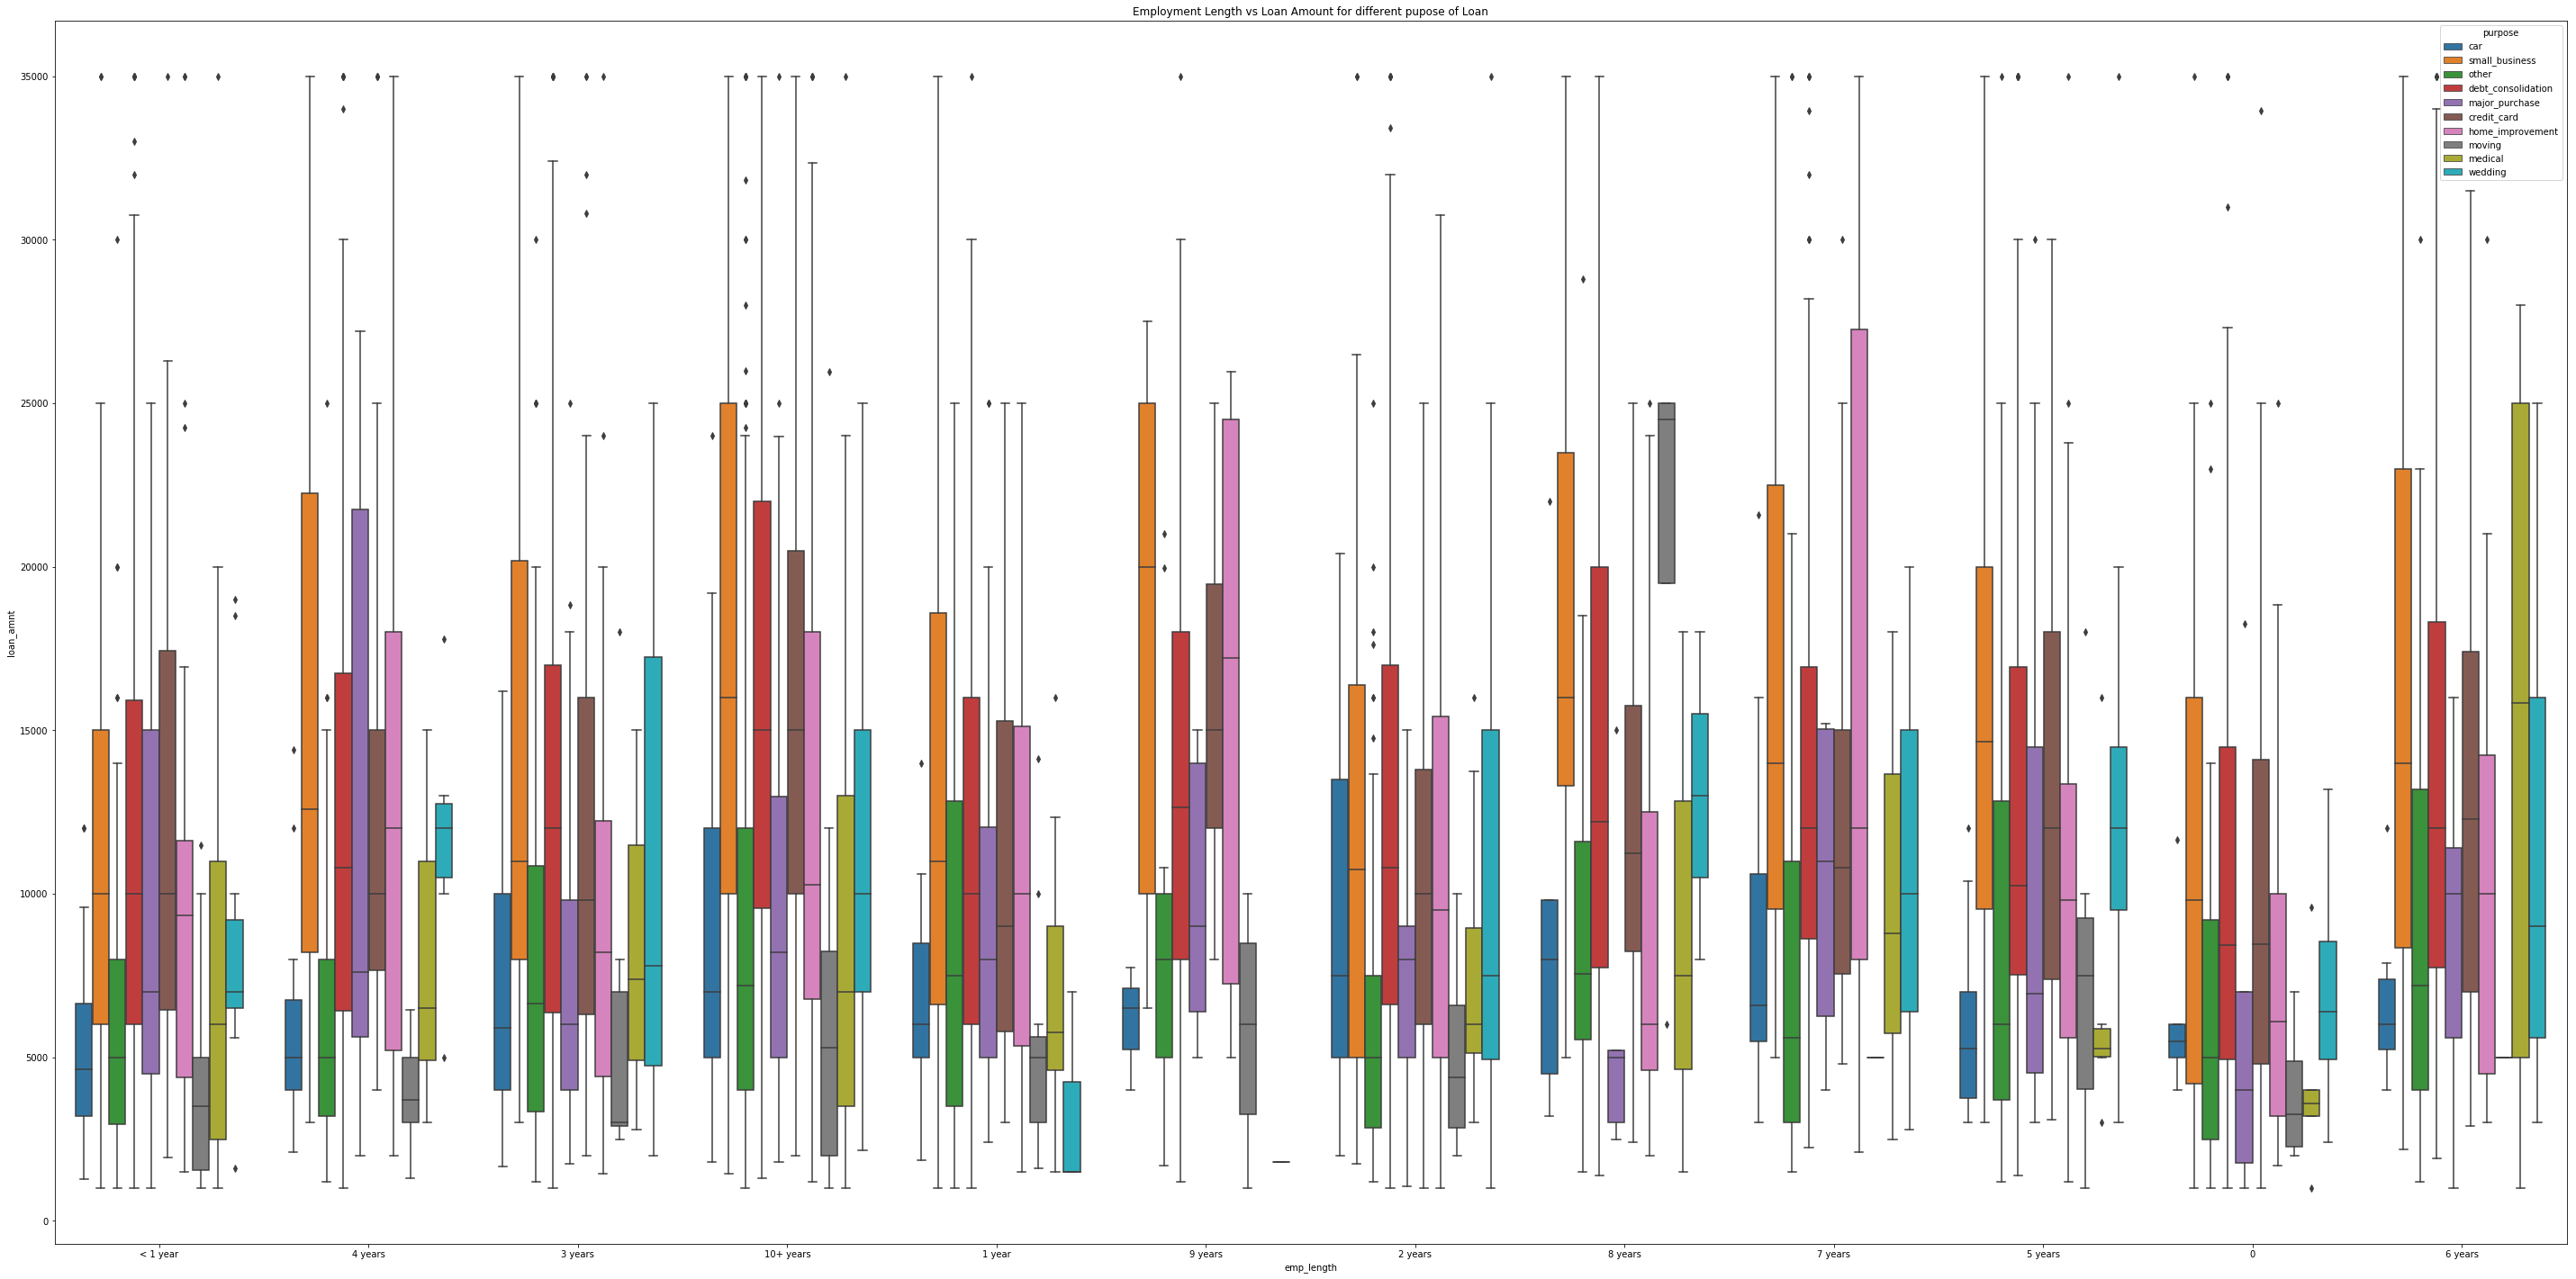

In [53]:
plt.figure(figsize=(50,25))
sns.boxplot( x="emp_length", y='loan_amnt',data=loanstatus,orient = 'v',hue='purpose')
plt.title("Employment Length vs Loan Amount for different pupose of Loan")
plt.show()

#### Categorical Variables vs Probability of Charged Off

#### 1. Location vs Probability Charge Of

In [54]:
def create_crosstab(df,col):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab


In [55]:
def bivariate_prob(df,col,stacked= True):

    plotCrosstab = create_crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(40,15), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

In [56]:
loc_vs_probability = create_crosstab(loan,'addr_state')
loc_vs_probability

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
AK,15,2,63,80,0.19
AL,54,17,381,452,0.12
AR,27,10,208,245,0.11
AZ,123,30,726,879,0.14
CA,1125,150,5824,7099,0.16
CO,98,26,668,792,0.12
CT,94,25,632,751,0.12
DC,15,3,196,214,0.07
DE,12,1,101,114,0.10


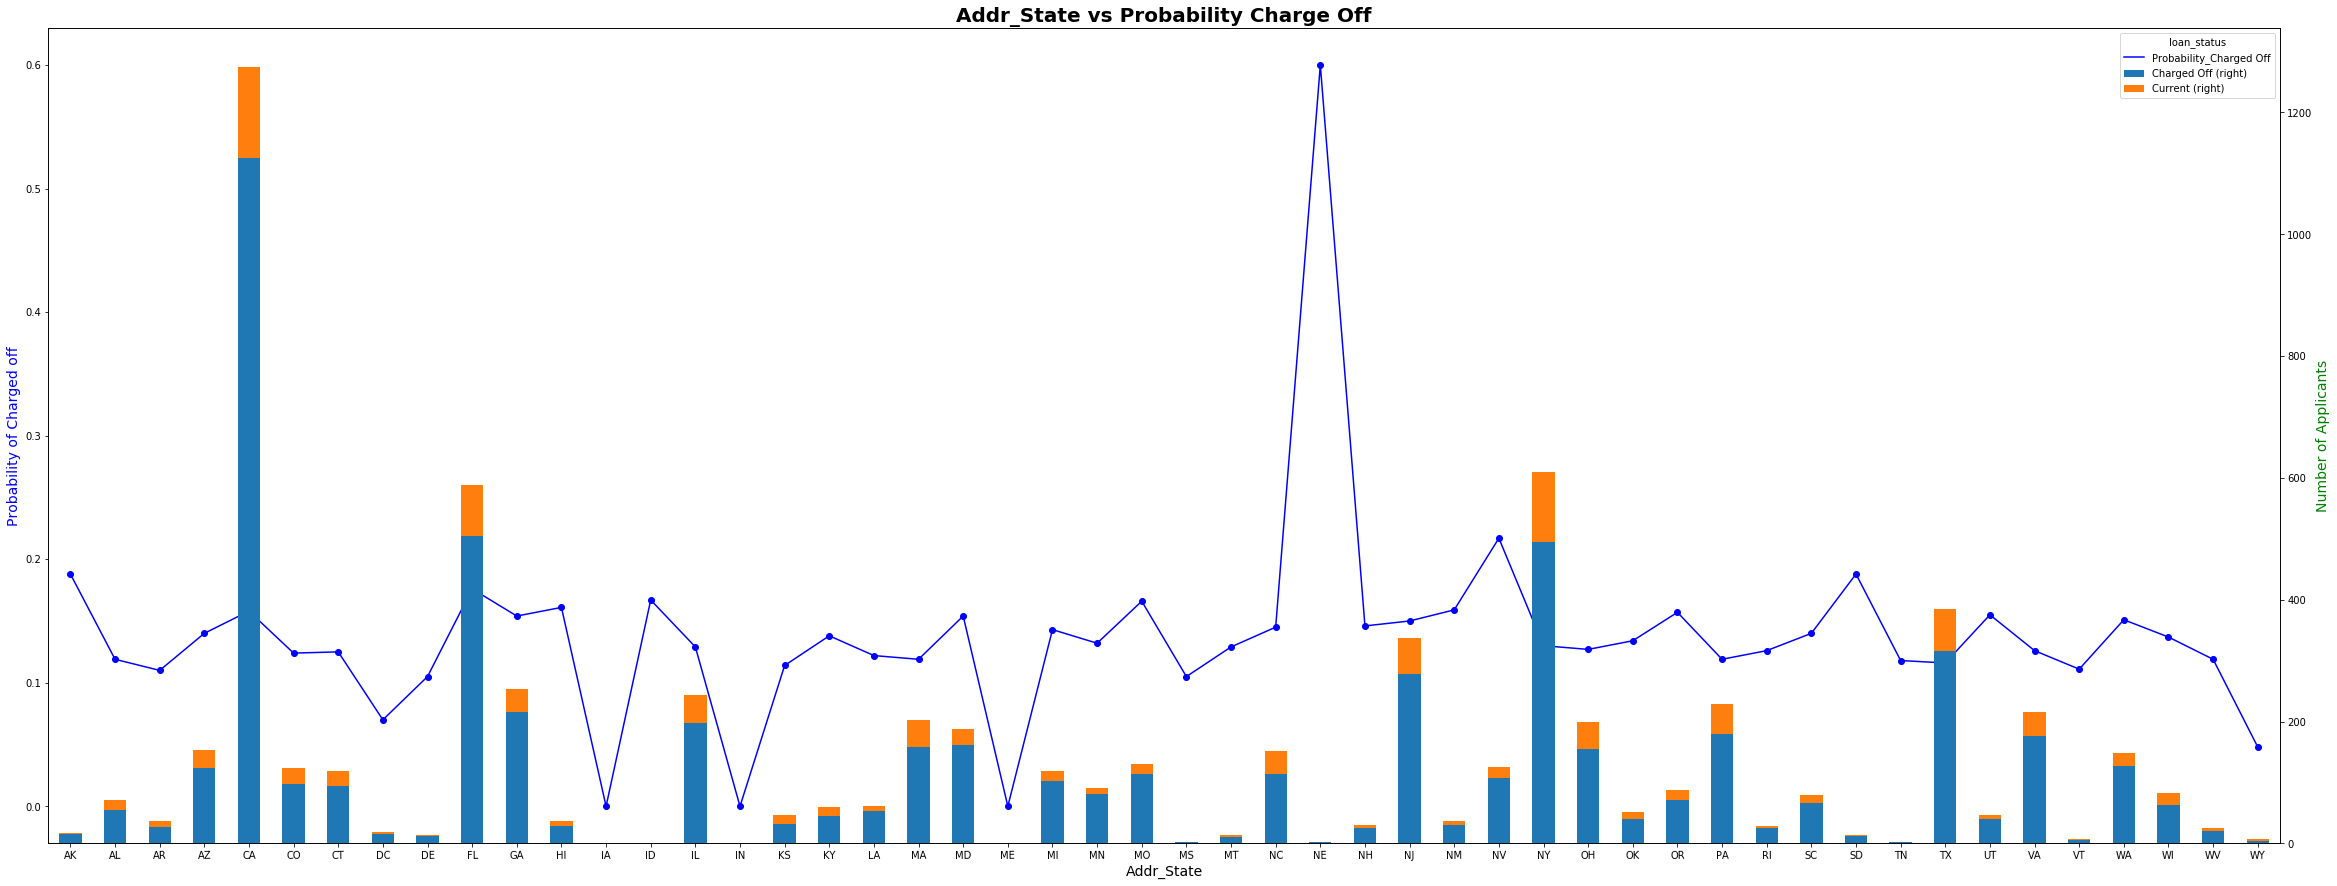

In [57]:
bivariate_prob(loan,'addr_state')

#### 2. Purpose of Loan vs Probability Charge Off

In [58]:
purpose_vs_probability = create_crosstab(loan,'purpose')
purpose_vs_probability

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,160,50,1339,1549,0.10
credit_card,542,103,4485,5130,0.11
debt_consolidation,2767,586,15288,18641,0.15
educational,56,0,269,325,0.17
home_improvement,347,101,2528,2976,0.12
house,59,14,308,381,0.15
major_purchase,222,37,1928,2187,0.10
medical,106,12,575,693,0.15
moving,92,7,484,583,0.16


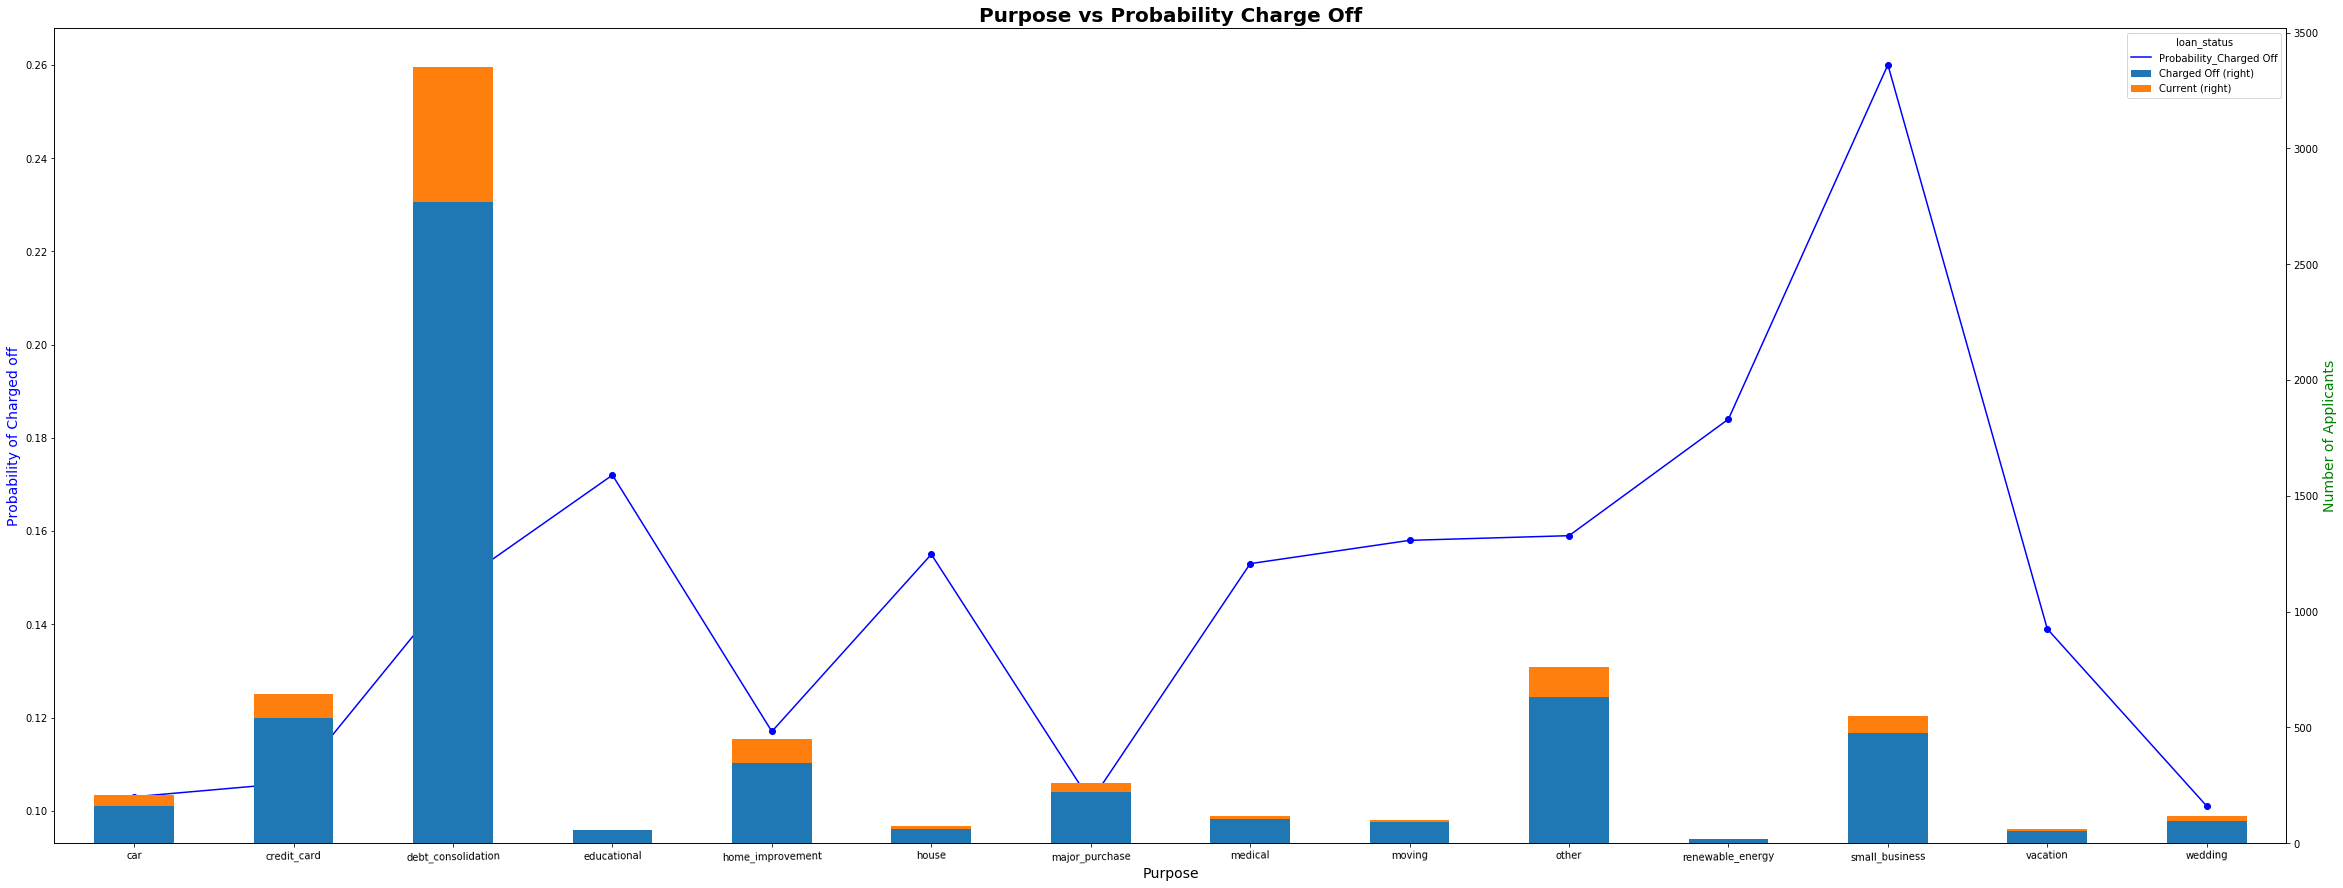

In [59]:
bivariate_prob(loan,'purpose')

#### 3. Grade/Subgrade vs Probability Charge Of

In [61]:
grade_vs_probability = create_crosstab(loan,'grade')
grade_vs_probability

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,602,40,9443,10085,0.06
B,1425,345,10250,12020,0.12
C,1347,264,6487,8098,0.17
D,1118,222,3967,5307,0.21
E,715,179,1948,2842,0.25
F,319,73,657,1049,0.30
G,101,17,198,316,0.32


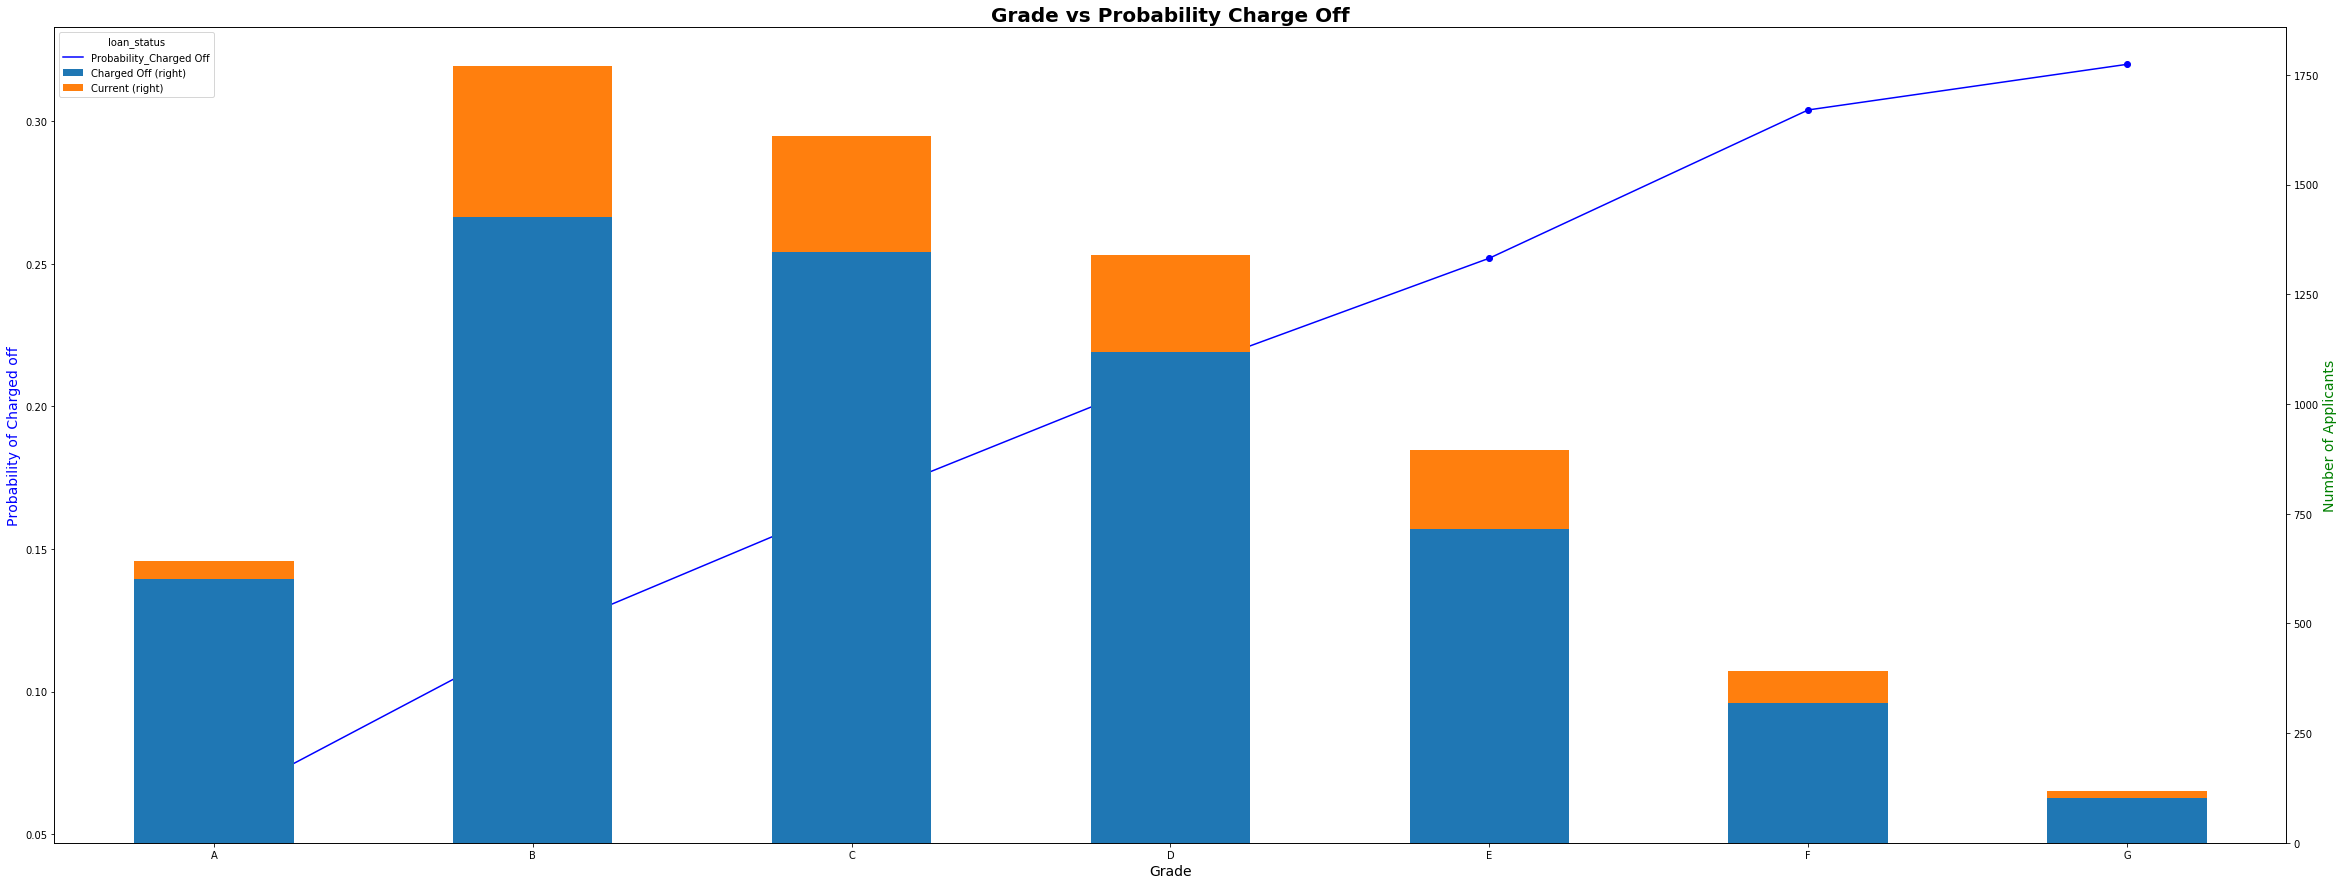

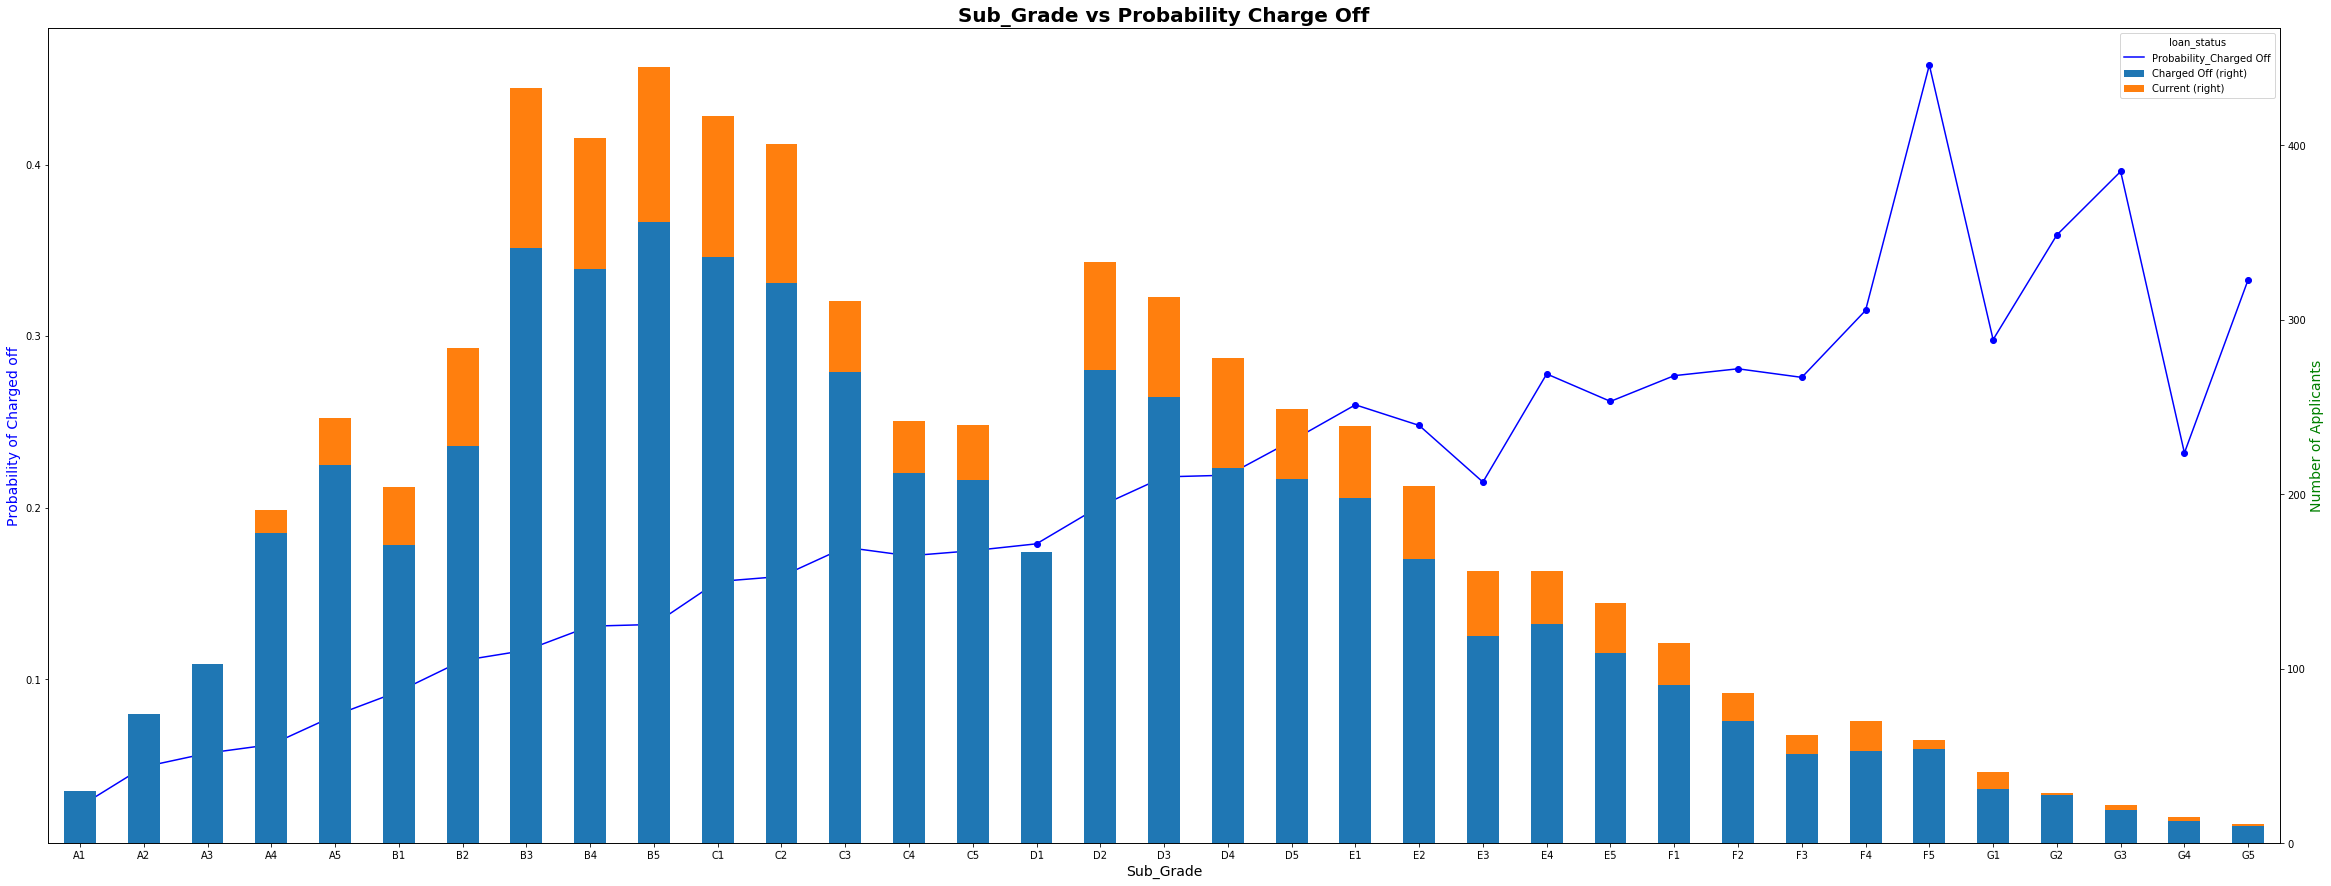

In [62]:
bivariate_prob(loan,'grade')
bivariate_prob(df =loan,col ='sub_grade')

#### 4. Annual Income Range vs Probability Charge Off

In [63]:
annual_inc_range_vs_probability = create_crosstab(loan,'annual_inc_range')
annual_inc_range_vs_probability

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,,
0-25000,488,26,2062,2576,0.19
25000-50000,2125,329,10714,13168,0.16
50000-75000,1686,359,9982,6259,0.27
75000-100000,736,220,5303,12027,0.06
100000 and above,591,206,4876,5673,0.10


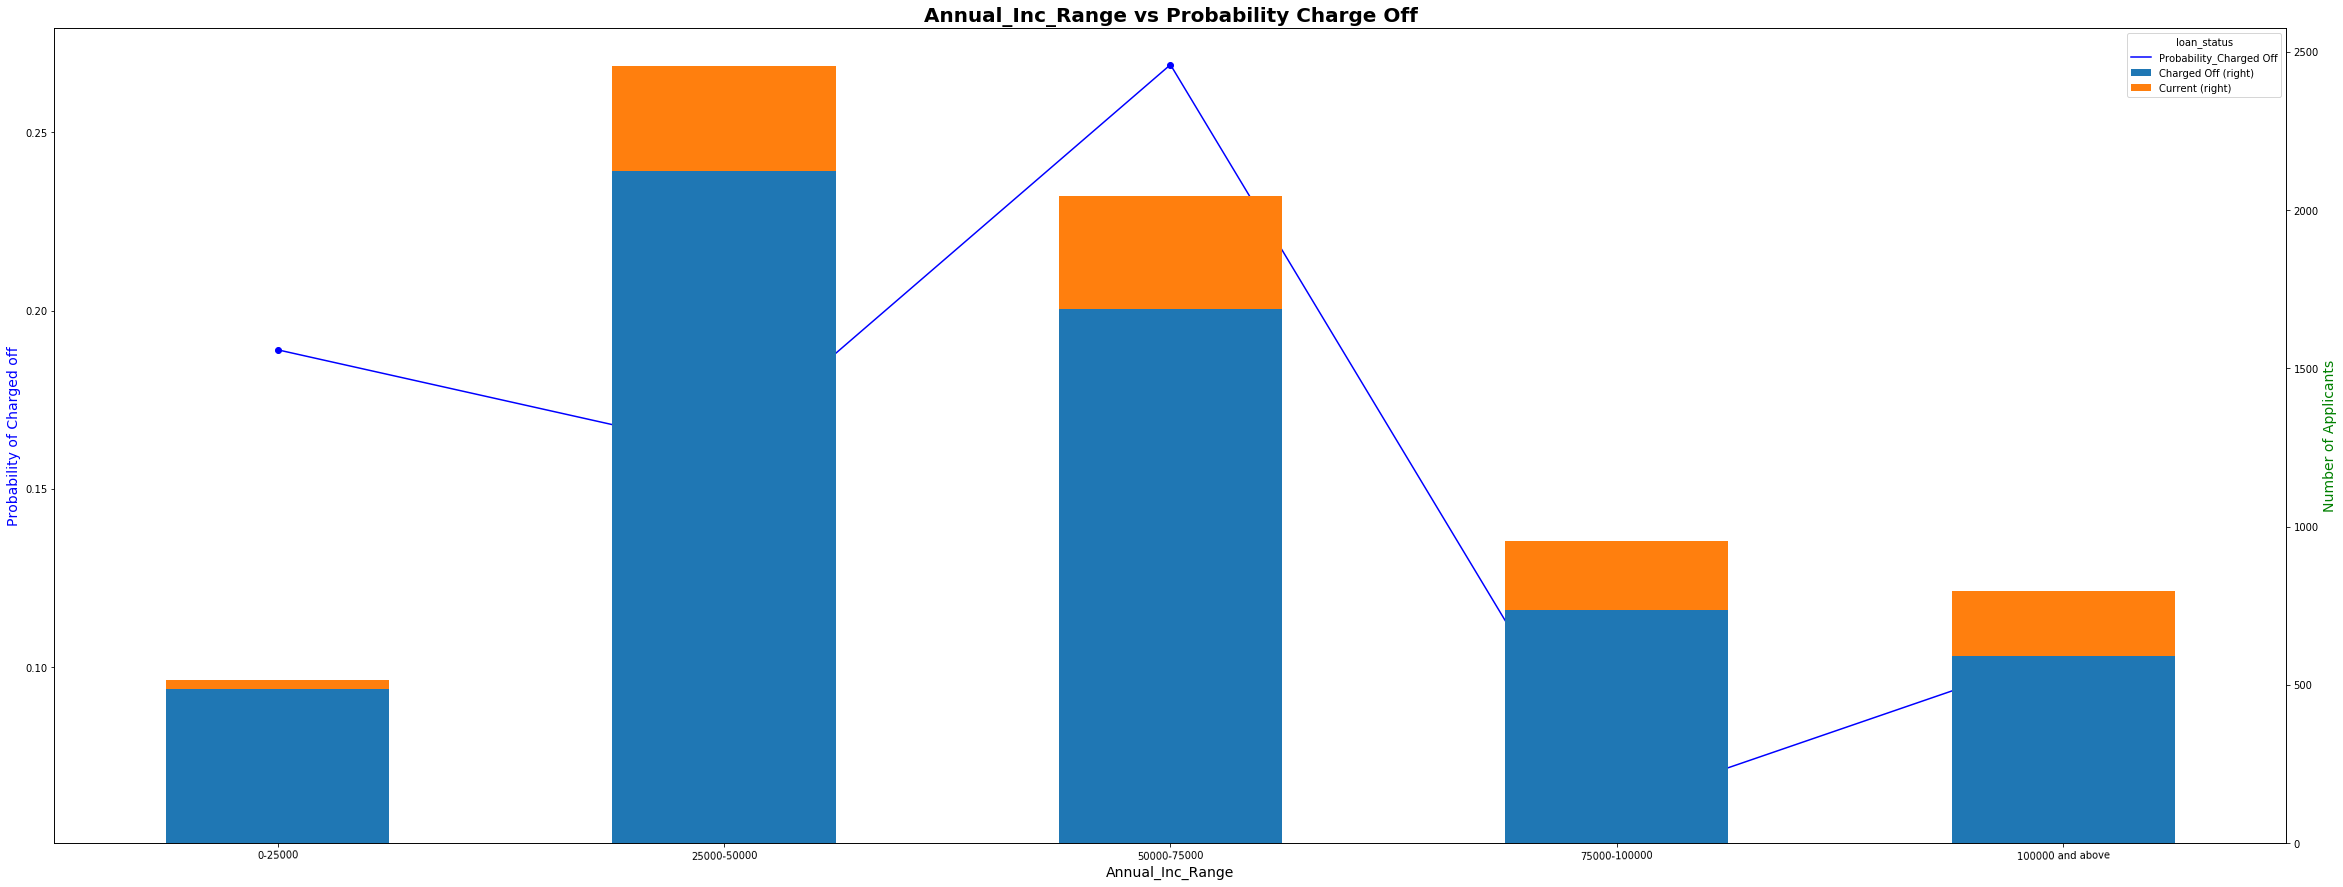

In [64]:
bivariate_prob(df =loan,col ='annual_inc_range')

#### 5. Interest rate Range vs Probability Charge Off

In [65]:
int_rate_range_vs_probability = create_crosstab(loan,'int_rate_range')
int_rate_range_vs_probability

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,,
0-7.5,256,7,5114,7658,0.03
7.5-10,574,70,6372,9144,0.06
10-12.5,1232,270,8148,5377,0.23
12.5-15,1475,259,7410,9650,0.15
15 and above,1794,432,5432,7016,0.26


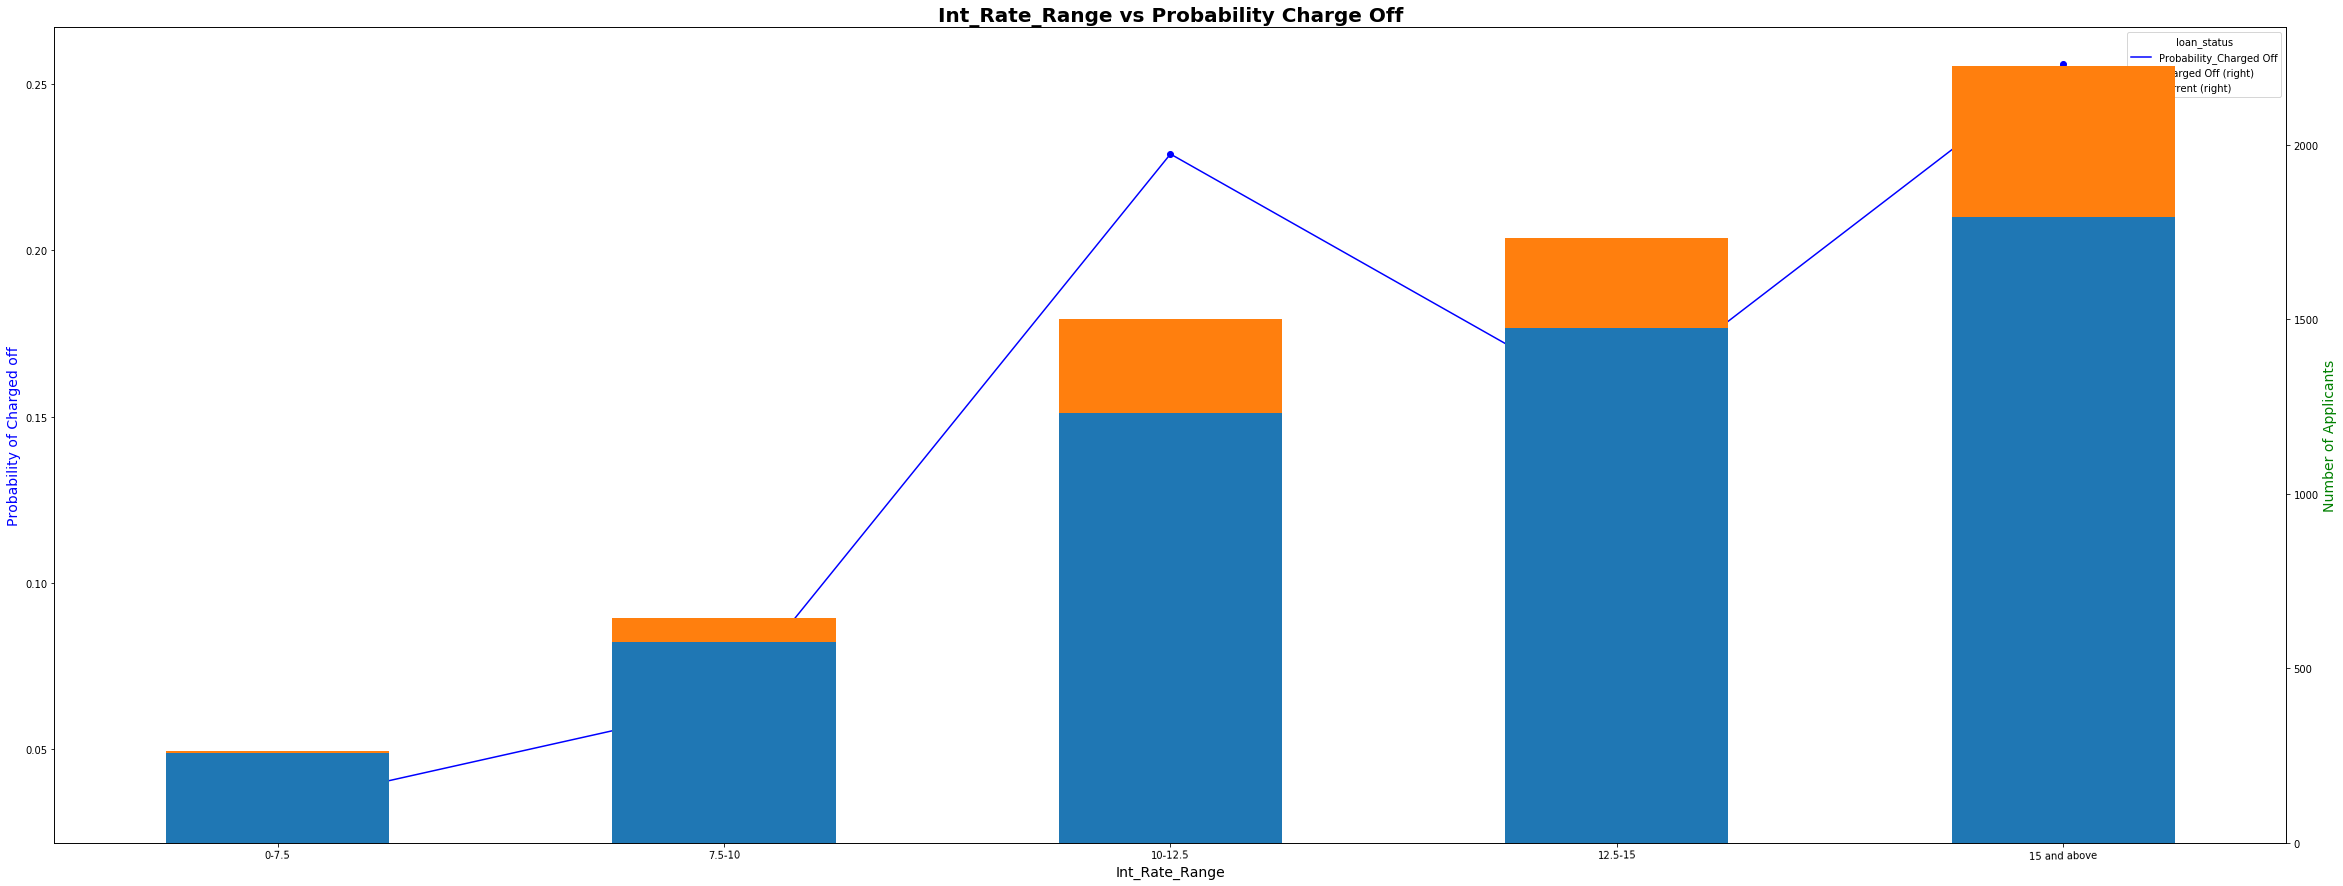

In [66]:
bivariate_prob(df =loan,col ='int_rate_range')

#### 6. Employment Length vs Probability Charge Off

In [67]:
emp_length_vs_probability = create_crosstab(loan,'emp_length')
emp_length_vs_probability

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
0,228,42,805,1075,0.21
1 year,456,71,2713,3240,0.14
10+ years,1331,391,7157,8879,0.15
2 years,567,97,3724,4388,0.13
3 years,555,83,3457,4095,0.14
4 years,462,94,2880,3436,0.13
5 years,458,88,2736,3282,0.14
6 years,307,61,1861,2229,0.14
7 years,263,62,1448,1773,0.15


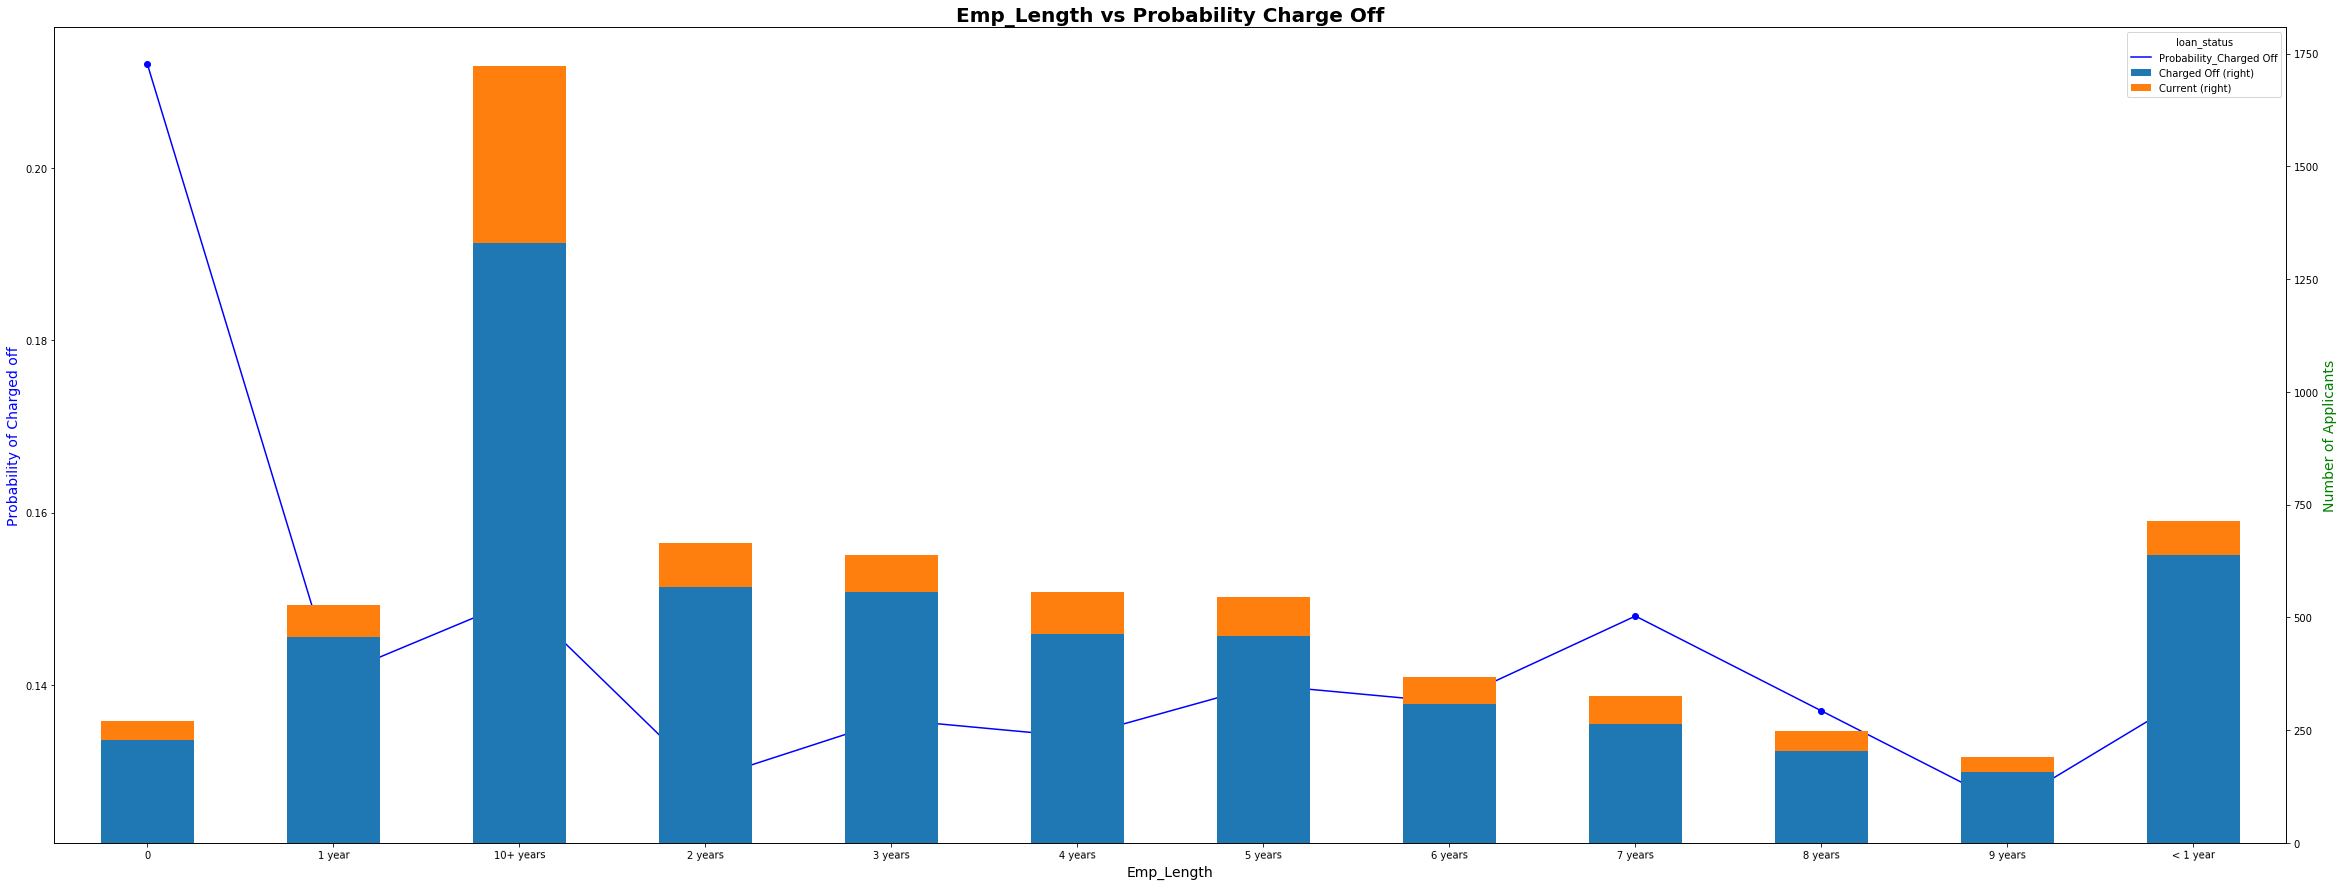

In [68]:
bivariate_prob(df =loan,col ='emp_length')